In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

from yahoo_fin.stock_info import get_data

In [4]:
EBAY_df= get_data("EBAY", start_date="12/04/2010", end_date="07/04/2022", index_as_date = False, interval="1d")
EBAY_df

,date,open,high,low,close,adjclose,volume,ticker
0,2010-12-06,12.407407,12.550505,12.377946,12.411616,11.818234,20394871,EBAY
1,2010-12-07,12.563131,12.803030,12.554714,12.626263,12.022618,35430437,EBAY
2,2010-12-08,12.672559,12.723064,12.470539,12.689394,12.082733,25010251,EBAY
3,2010-12-09,12.727273,12.819865,12.702020,12.773569,12.162882,20779308,EBAY
4,2010-12-10,12.836700,12.967172,12.765152,12.916667,12.299140,23931785,EBAY
...,...,...,...,...,...,...,...,...
2908,2022-06-27,45.869999,45.939999,44.220001,44.380001,44.380001,4703400,EBAY
2909,2022-06-28,43.400002,44.480000,42.599998,42.650002,42.650002,5435600,EBAY
2910,2022-06-29,42.580002,43.029999,42.299999,42.669998,42.669998,3517100,EBAY
2911,2022-06-30,42.419998,42.419998,41.020000,41.669998,41.669998,6571700,EBAY


In [5]:
print(EBAY_df.describe())


              open         high          low        close     adjclose  \
count  2913.000000  2913.000000  2913.000000  2913.000000  2913.000000   
mean     32.541338    32.934129    32.169848    32.550107    31.394977   
std      15.171868    15.395408    14.966323    15.170005    15.130626   
min      11.502525    11.780303    11.304714    11.342593    10.800321   
25%      22.213804    22.432659    21.978113    22.234848    21.171829   
50%      28.799999    29.100000    28.500000    28.840000    27.489767   
75%      38.540001    39.029999    38.209999    38.590000    36.932949   
max      80.970001    81.190002    79.900002    80.589996    79.691910   

             volume  
count  2.913000e+03  
mean   1.665993e+07  
std    1.308184e+07  
min    2.129200e+06  
25%    7.722400e+06  
50%    1.242360e+07  
75%    2.206300e+07  
max    1.835567e+08  


In [6]:
EBAY_df.set_index(pd.DatetimeIndex(EBAY_df['date']), inplace=True)


In [7]:
EBAY_df = EBAY_df[['close']]
EBAY_df

,close
date,
2010-12-06,12.411616
2010-12-07,12.626263
2010-12-08,12.689394
2010-12-09,12.773569
2010-12-10,12.916667
...,...
2022-06-27,44.380001
2022-06-28,42.650002
2022-06-29,42.669998


In [8]:
print (EBAY_df.index.max())


2022-07-01 00:00:00


In [9]:
EBAY_data = EBAY_df.filter(['close'])
EBAY_dataset = EBAY_data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(EBAY_dataset)

training_data_len =math.ceil(len(EBAY_dataset) *.7)
train_data =scaled_data[0:training_data_len , : ]


X_train_data = []
y_train_data = []

for i in range(1500,len(train_data)):
    X_train_data=list(X_train_data)
    y_train_data=list(y_train_data)
    X_train_data.append(train_data[i-1500:i,0])
    y_train_data.append(train_data[i,0])
    
    X_train_data1, y_train_data1 = np.array(X_train_data), np.array(y_train_data)
    
    X_train_data2 = np.reshape(X_train_data1,(X_train_data1.shape[0],X_train_data1.shape[1],1))

In [10]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True,input_shape=(X_train_data2.shape[1],1)))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dense(units=25))

model.add(Dense(units=1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_data2, y_train_data1, batch_size=1, epochs=1)

540/540 [==============================] - 148s 271ms/step - loss: 0.0014


In [12]:
test_data = scaled_data[training_data_len -1500: , : ]

X_test = []

y_test = EBAY_dataset[training_data_len : , : ]

for i in range(1500,len(test_data)):
    
    X_test.append(test_data[i-1500:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 5s 172ms/step


In [13]:
rmse=np.sqrt(np.mean(((predictions-y_test)**2)))

In [14]:
print(rmse)


2.2054686088899165


c:\Users\matth\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


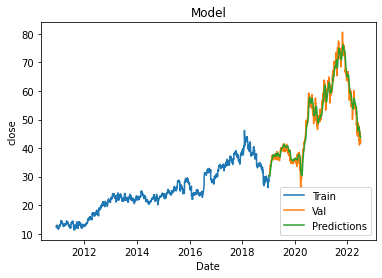

In [15]:
train = EBAY_df[:training_data_len]

valid = EBAY_df[training_data_len:]

valid['Predictions'] = predictions

plt.title('Model')

plt.xlabel('Date')

plt.ylabel('close')

plt.plot(train['close'])

plt.plot(valid[['close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

plt.show()

<AxesSubplot:xlabel='date'>

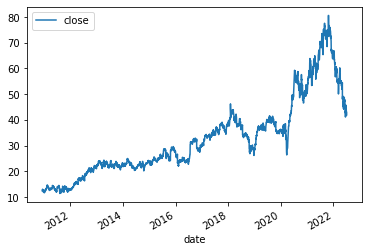

In [16]:
EBAY_df.plot()

In [17]:
complete_EBAY_df = pd.concat([train[['close']], valid[['close', 'Predictions']]])
complete_EBAY_df

,close,Predictions
date,,
2010-12-06,12.411616,NaN
2010-12-07,12.626263,NaN
2010-12-08,12.689394,NaN
2010-12-09,12.773569,NaN
2010-12-10,12.916667,NaN
...,...,...
2022-06-27,44.380001,44.039024
2022-06-28,42.650002,44.043385
2022-06-29,42.669998,43.988388


In [18]:
EBAY_df.to_csv("EBAY_df.csv", index=False)

In [19]:
complete_EBAY_df.to_csv("complete_EBAY_df.csv", index=False)